In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('orders.csv')
df1['eval_set'].count()

# prior, train 차이가 뭐지.

3421083

In [3]:
train_orders = df1[df1['eval_set'] == 'train']
train_orders.tail()
# eval_set에서 train만 담당하는 애들

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0
3421082,272231,206209,train,14,6,14,30.0


In [13]:
train_orders.columns

Index([u'order_id', u'user_id', u'eval_set', u'order_number', u'order_dow',
       u'order_hour_of_day', u'days_since_prior_order'],
      dtype='object')

In [20]:
df1 = train_orders['days_since_prior_order'].value_counts().index.tolist()
# 밸류카운트에서 인덱스만 뽑는 함수!!
## dataframe[column].value_counts().index.tolist()

In [21]:
df2 = list(train_orders['days_since_prior_order'].value_counts())

([<matplotlib.patches.Wedge at 0x87072b0>,
  <matplotlib.text.Text at 0x8855370>])

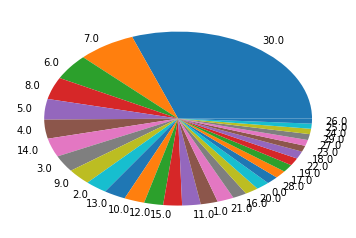

In [22]:
plt.pie(df2, labels = df1)

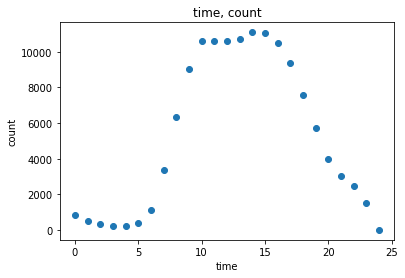

In [4]:
val_list = {}
for i in range(0,25):
    val = train_orders[train_orders['order_hour_of_day'] == i]['user_id'].count()
    val_list[i] = val
    #print 'the time {} has {} counts'.format(i,val)

plt.scatter(val_list.keys(), val_list.values())
plt.xlabel('time')
plt.ylabel('count')
plt.title('time, count')
# 10-16시에 시키는 사람이 많다. 다수에 사람들이 집중되어있음.

([<matplotlib.patches.Wedge at 0xe5bf9f0>,
  <matplotlib.text.Text at 0xe2d9790>])

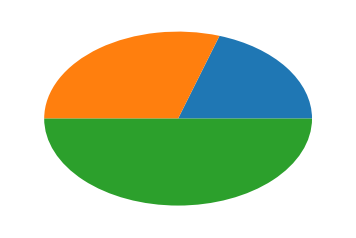

In [8]:
data =[20,30,50]
plt.pie(data)

In [29]:
train_orders[train_orders['order_hour_of_day'] == 16]['user_id'].count()

10495

In [26]:
bins = [2,5,12,17,21,25]
df2 = pd.cut(train_orders['order_hour_of_day'], bins)
# bins기준으로 나눈다. 기준은 2-5, 5-12, 12-17, 17-21, 21-25 이다

10          (5, 12]
25          (5, 12]
49          (5, 12]
74          (5, 12]
78         (12, 17]
82          (5, 12]
88         (17, 21]
115        (17, 21]
129        (17, 21]
200         (5, 12]
207         (5, 12]
256         (5, 12]
277         (5, 12]
296        (12, 17]
395        (12, 17]
439         (5, 12]
448        (12, 17]
485        (12, 17]
557        (12, 17]
570         (5, 12]
594        (17, 21]
611         (5, 12]
623         (5, 12]
627         (5, 12]
652        (17, 21]
658        (21, 25]
669        (17, 21]
678         (5, 12]
746         (5, 12]
778        (12, 17]
             ...   
3420282     (5, 12]
3420328     (5, 12]
3420340    (12, 17]
3420368         NaN
3420393    (12, 17]
3420415    (12, 17]
3420422     (5, 12]
3420429    (21, 25]
3420436     (5, 12]
3420493    (21, 25]
3420500    (12, 17]
3420515    (12, 17]
3420523    (12, 17]
3420543     (5, 12]
3420581    (12, 17]
3420612    (12, 17]
3420623    (12, 17]
3420627    (12, 17]
3420670    (17, 21]


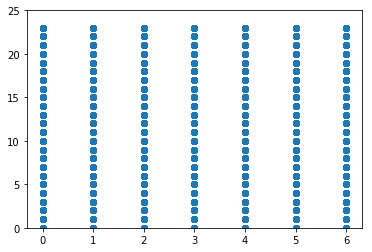

In [22]:
df1 = train_orders.set_index('days_since_prior_order')
# prior_order에 따른 user_id,
# order_dow와 시간 비분석, 요일별 시킨 시간
plt.scatter(train_orders['order_dow'], train_orders['order_hour_of_day'])
plt.ylim(0,25)
plt.show()

In [23]:
train_orders['order_hour_of_day'].value_counts()

14    11103
15    11075
13    10711
12    10622
11    10610
10    10585
16    10495
17     9353
9      9033
18     7558
8      6343
19     5721
20     3978
7      3376
21     3050
22     2442
23     1526
6      1121
0       852
1       507
5       402
2       305
3       223
4       218
Name: order_hour_of_day, dtype: int64

1. 유저 아이디 소트, 유저별 빈도수? 확인
    - order_number, day_since_prior, order_hour_of_day 활용
2. order dow 빈도 확인, 날짜 파악?
3. 유저 아이디, 오더 시간 학인을 통한 유저 연령대 파악


order_id, user_id는 각각의 고유값으로 존재함.
order_dow(날짜) 는 0과 1에 몰려 있는 모습, 나머지는 평균값
주문시간은 평균 13시이며 15시에 몰려 있다.
가장 최근 주문은 7일, 30일이 많다.

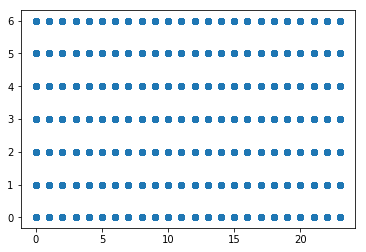

In [10]:
plt.scatter(train_orders['order_hour_of_day'], train_orders['order_dow'])

In [4]:
train_orders.count()

order_id                  131209
user_id                   131209
eval_set                  131209
order_number              131209
order_dow                 131209
order_hour_of_day         131209
days_since_prior_order    131209
dtype: int64

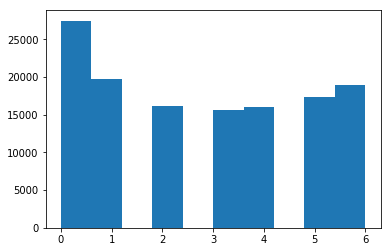

In [5]:
plt.hist(train_orders['order_dow'])
plt.show()

count    131209.000000
mean         13.581363
std           4.221325
min           0.000000
25%          10.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


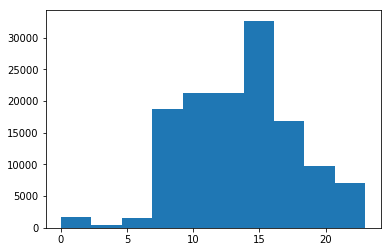

In [6]:
plt.hist(train_orders['order_hour_of_day'])
print train_orders['order_hour_of_day'].describe()

30.0    40119
7.0      9154
6.0      6207
8.0      5371
5.0      5025
4.0      4606
14.0     4516
3.0      4016
9.0      3868
2.0      3496
13.0     3452
10.0     3219
12.0     3015
15.0     2975
11.0     2927
1.0      2716
21.0     2621
16.0     2211
20.0     2142
0.0      2126
28.0     1898
17.0     1875
19.0     1859
22.0     1832
18.0     1828
23.0     1474
27.0     1457
29.0     1442
24.0     1304
25.0     1240
26.0     1218
Name: days_since_prior_order, dtype: int64


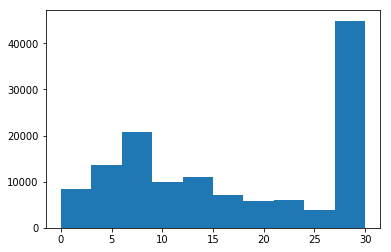

In [7]:
plt.hist(train_orders['days_since_prior_order'])
print train_orders['days_since_prior_order'].value_counts()